In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [2]:
motyw <- theme(axis.title = element_text(size=rel(2)),
             axis.text = element_text(size=rel(1.5)),
             plot.title = element_text(size=rel(2), colour = "blue"),
             panel.grid.major = element_line(colour = "black"))

In [3]:
ankieta <- read.csv(file='archive/LIQuizPollData.csv')
head(ankieta)

Quiz_number,Total_Views,Total_Responses,Right_Answers,Total_Likes,Avg_right,Max_Right
1,134100,3486,1424,84,41%,Yes
2,172686,5669,4093,139,72%,Yes
3,113495,2128,1175,74,55%,Yes
4,73924,347,142,33,41%,Yes
5,100538,1559,917,54,59%,Yes
6,83232,769,246,51,32%,Yes


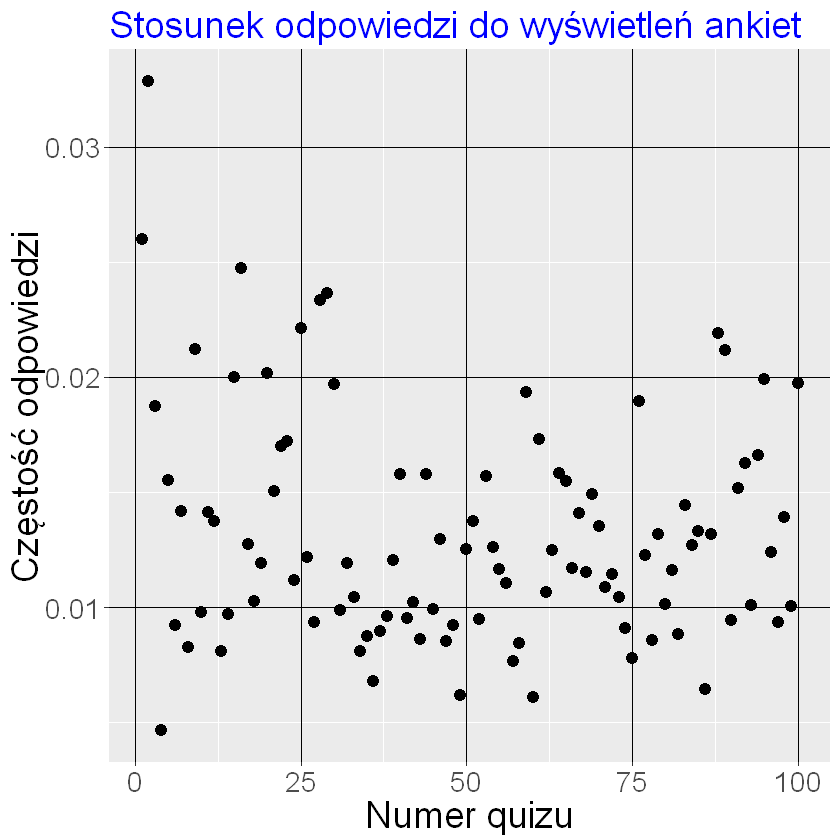

In [4]:
ggplot(ankieta, aes(x = Quiz_number , y = Total_Responses/Total_Views)) + 
        geom_point(size=3)+
        #geom_smooth(method='loess')+
        labs(title='Stosunek odpowiedzi do wyświetleń ankiet') +
        xlab("Numer quizu")+
        ylab("Częstość odpowiedzi")+
        motyw

Wnioski: Zazwyczaj ponad 80% osób którym ankieta się wyświetliła wyłącza ją

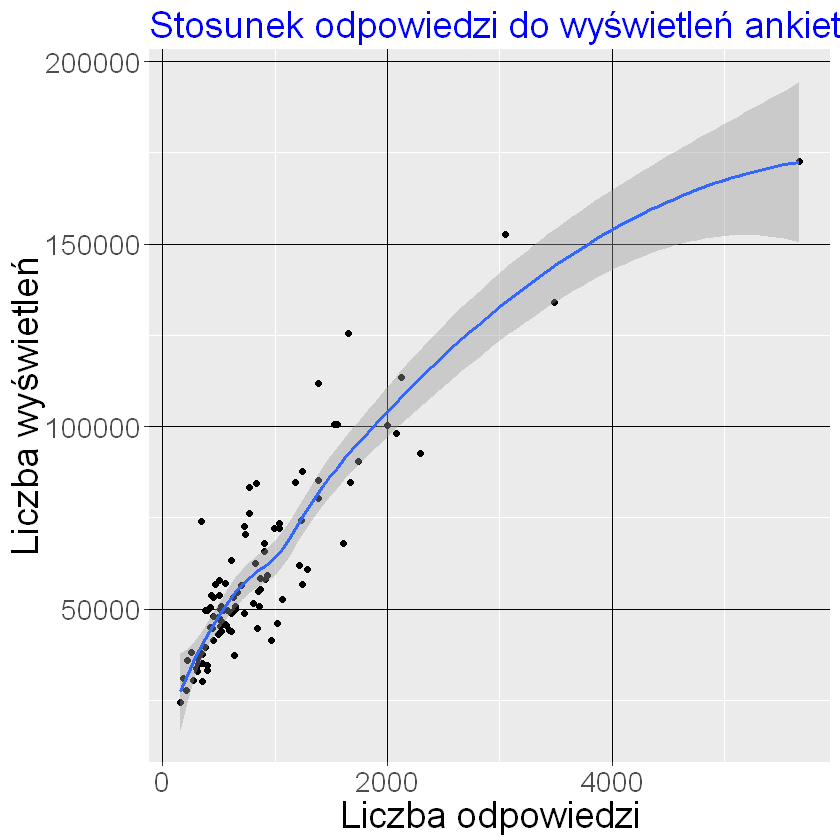

In [5]:
ggplot(ankieta, aes(x = Total_Responses , y = Total_Views)) + 
        geom_point() +
        stat_smooth(method='loess')+
        labs(title='Stosunek odpowiedzi do wyświetleń ankiet')+
        xlab("Liczba odpowiedzi")+
        ylab("Liczba wyświetleń")+
        motyw


Wnioski: Im więcej wyświetleń tym więcej lajków :)

In [6]:
populacja <- read.csv(file='arab_population_csv.csv')
head(populacja)

Country.Name,Country.Code,Year,Value
Arab World,ARB,1960,92197753
Arab World,ARB,1961,94724510
Arab World,ARB,1962,97334442
Arab World,ARB,1963,100034179
Arab World,ARB,1964,102832760
Arab World,ARB,1965,105736431


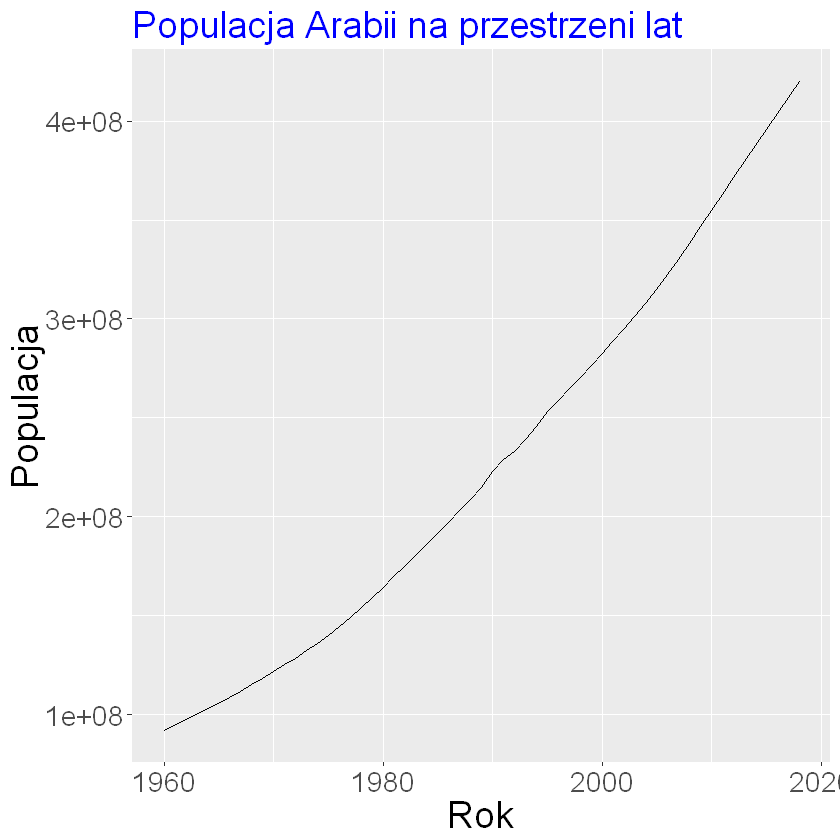

In [7]:
ggplot(populacja, aes(Year, Value)) +
        geom_line() +
        labs(title="Populacja Arabii na przestrzeni lat") +
        xlab("Rok") +
        ylab("Populacja")+
        motyw+
theme(panel.grid.major = element_line(colour = "white"))

Wnioski: Populacja Arabii rośnie i ma się dobrze. Funkcja przypomina funkcję kwadratową o bardzo małym współczynniku kierunkowym

In [8]:
rowery <- read.csv(file='bike_buyers/bike_buyers_clean.csv')
head(rowery)

ď.żID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


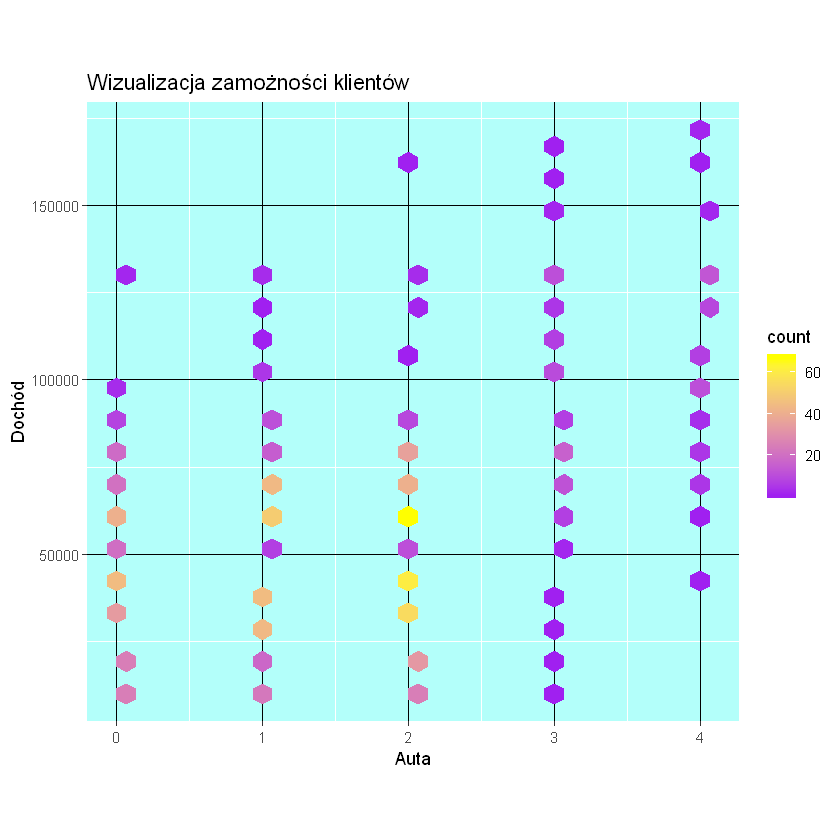

In [9]:
ggplot(rowery, aes(Cars, Income), color="purple")+
    stat_bin_hex()+
    scale_fill_gradient(low = "purple", high = "yellow")+
    theme(panel.background = element_rect(fill = "#b3fffa"),
          panel.grid.major = element_line(colour = "black"),
          aspect.ratio=0.95)+
    labs(title="Wizualizacja zamożności klientów")+ #w zależności od dochodów i ilości posiadanych aut
    xlab("Auta")+
    ylab("Dochód")

Wnioski: Zdecydowana większość klientów ma 2 lub mniej aut. Najwięcej osób ma 2 auta przy dochodzie około 62,5 tysiąca (około 80 osób). Nikt kto ma dochód powyżej 100 tysięcy nie ma mniej niż 2 auta. Zdecydowana większość klientów posiadających 4 auta ma dochód większy niz 50 tysięcy

In [10]:
moj_motyw <- theme(axis.title = element_text(size=rel(2)),
             axis.text = element_text(size=rel(1.5)),
             plot.title = element_text(size=rel(3), colour = "blue"),
             panel.grid.major = element_line(colour = "black"),
             legend.background = element_rect(fill="#ececec",
                                              colour="black",
                                              linetype=3),
             legend.title = element_text(size=rel(2)),
             legend.text = element_text(size=rel(1.5))) 

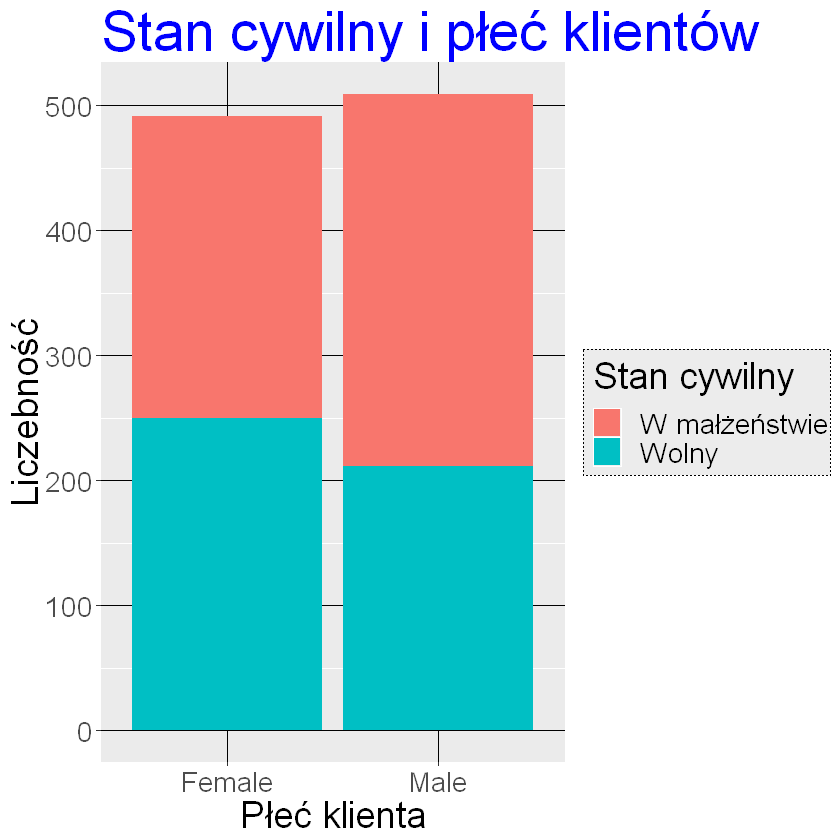

In [11]:
ggplot(rowery, aes(Gender))+
        geom_bar(aes(fill=Marital.Status))+
        labs(title="Stan cywilny i płeć klientów")+
        xlab("Płeć klienta")+
        ylab("Liczebność")+
        scale_fill_discrete(name="Stan cywilny", labels=c("W małżeństwie", "Wolny"))+
        moj_motyw

Wnioski: Więcej kobiet jest w małżeństwie niż mężczyzn. Można powiedzieć że liczba klientów rozkłada się porówno między obie płcie